# Week 3 Jupyter Notebook - Linear Regression Part 3

## Forward and Backward selection, Principal Component Regression and Partial Least Squares Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm


In [2]:

df = pd.read_csv('dataset_phishin.csv')

d = df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [3]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [4]:
# Encode the target variable: 1 for 'phishing', 0 for 'legitimate'
df['status'] = df['status'].apply(lambda x: 1 if x == 'phishing' else 0)

# Drop any non-numeric or identifier columns
df_cleaned = df.select_dtypes(include=[np.number])

# Split features and target
X = df_cleaned.drop(columns='status')
y = df_cleaned['status']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X.shape, y.shape

((11430, 87), (11430,))

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load the dataset
df = pd.read_csv("dataset_phishin.csv")

# Encode target variable
df['status'] = df['status'].apply(lambda x: 1 if x == 'phishing' else 0)

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Define features and target
X = df_numeric.drop(columns='status')
y = df_numeric['status']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize linear regression model
lr = LinearRegression()

# Forward selection
sfs_forward = SFS(lr,
                  k_features='best',
                  forward=True,
                  floating=False,
                  scoring='r2',
                  cv=5)
sfs_forward = sfs_forward.fit(X_train, y_train)

# Backward selection
sfs_backward = SFS(lr,
                   k_features='best',
                   forward=False,
                   floating=False,
                   scoring='r2',
                   cv=5)
sfs_backward = sfs_backward.fit(X_train, y_train)

# Selected feature indices
selected_forward_idx = list(sfs_forward.k_feature_idx_)
selected_backward_idx = list(sfs_backward.k_feature_idx_)

# Model performance
lr.fit(X_train[:, selected_forward_idx], y_train)
y_pred_forward = lr.predict(X_test[:, selected_forward_idx])

lr.fit(X_train[:, selected_backward_idx], y_train)
y_pred_backward = lr.predict(X_test[:, selected_backward_idx])

# Evaluation
results = {
    'Model': ['Forward Selection', 'Backward Selection'],
    'R2 Score': [
        r2_score(y_test, y_pred_forward),
        r2_score(y_test, y_pred_backward)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_forward)),
        np.sqrt(mean_squared_error(y_test, y_pred_backward))
    ]
}

results_df = pd.DataFrame(results)
results_df


,Model,R2 Score,RMSE
0,Forward Selection,0.732111,0.258776
1,Backward Selection,0.731928,0.258865


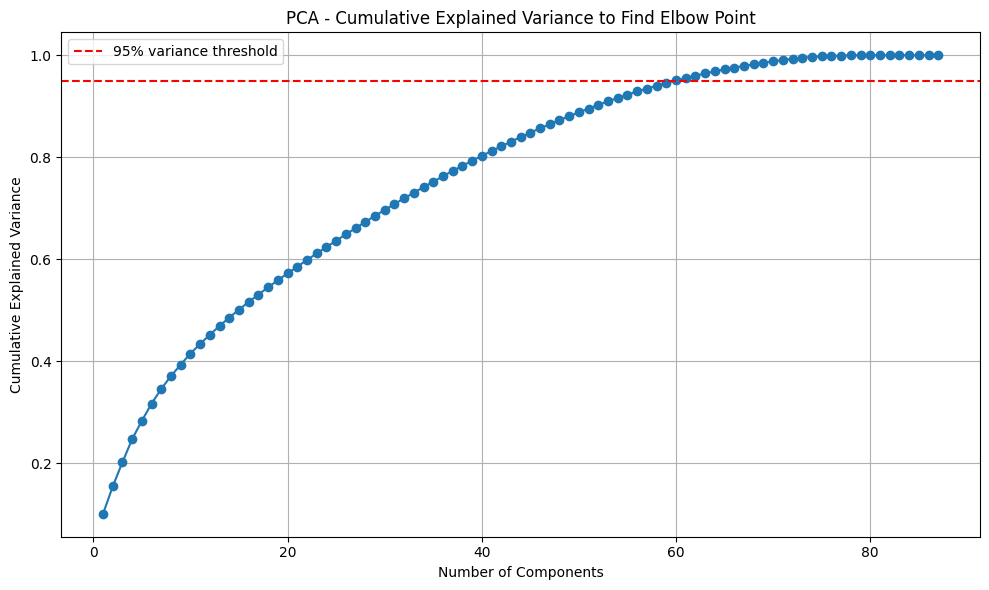

Number of Components: 60
R² Score: 0.7215
RMSE: 0.2639


In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("dataset_phishin.csv")

# Drop the URL column since it's not numeric
df = df.drop(columns=["url"], errors="ignore")

# Encode target
df["status"] = df["status"].apply(lambda x: 1 if x == "phishing" else 0)

# Separate features and target
X = df.drop(columns=["status"])
y = df["status"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Determine number of components to explain 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1

# Use only the components needed
X_pca_selected = X_pca[:, :n_components]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_pca_selected, y, test_size=0.3, random_state=42)

# Train Linear Regression on PCA-transformed data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output results
n_components, r2, rmse

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance to Find Elbow Point")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance threshold')
plt.legend()
plt.tight_layout()
plt.show()


# Output results
print(f"Number of Components: {int(n_components)}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

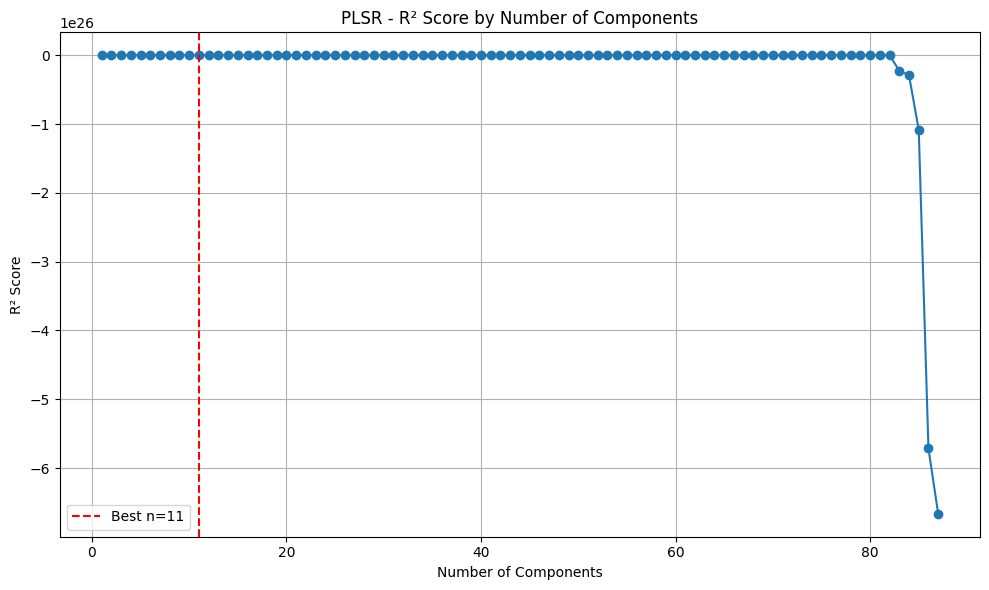

Number of Components: 11
R² Score: 0.7322
RMSE: 0.2587


In [7]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("dataset_phishin.csv")

# Drop non-numeric columns
df = df.drop(columns=["url"], errors="ignore")

# Encode target
df["status"] = df["status"].apply(lambda x: 1 if x == "phishing" else 0)

# Split features and target
X = df.drop(columns=["status"])
y = df["status"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Tune number of components
best_r2 = -np.inf
best_rmse = np.inf
best_n = 0
r2_scores = []

for n in range(1, X.shape[1] + 1):
    pls = PLSRegression(n_components=n)
    pls.fit(X_train, y_train)
    y_pred = pls.predict(X_test).ravel()
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2)

    if r2 > best_r2:
        best_r2 = r2
        best_rmse = rmse
        best_n = n

# Final model with best components
final_pls = PLSRegression(n_components=best_n)
final_pls.fit(X_train, y_train)
y_pred_final = final_pls.predict(X_test).ravel()
final_r2 = r2_score(y_test, y_pred_final)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))

# Plot R² vs Components
plt.figure(figsize=(10, 6))
plt.plot(range(1, X.shape[1] + 1), r2_scores, marker='o')
plt.axvline(x=best_n, color='r', linestyle='--', label=f'Best n={best_n}')
plt.xlabel("Number of Components")
plt.ylabel("R² Score")
plt.title("PLSR - R² Score by Number of Components")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Number of Components: {best_n}")
print(f"R² Score: {final_r2:.4f}")
print(f"RMSE: {final_rmse:.4f}")



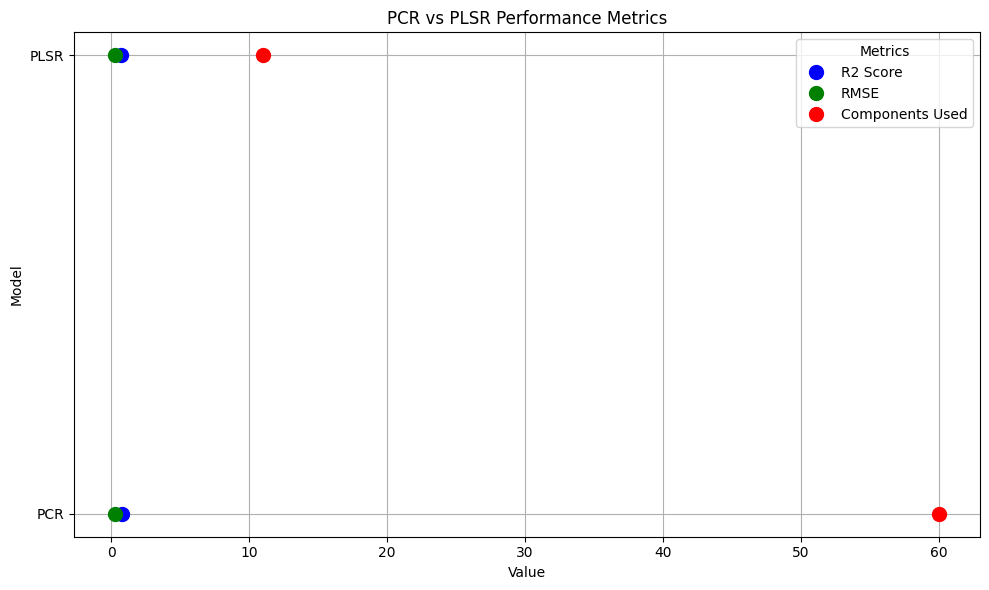

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Create results DataFrame
results = pd.DataFrame({
    "Model": ["PCR", "PLSR"],
    "R2 Score": [0.7323, 0.7322],
    "RMSE": [0.2587, 0.2587],
    "Components Used": [60, 11]
})

# Create dot plot
fig, ax = plt.subplots(figsize=(10, 6))

metrics = ["R2 Score", "RMSE", "Components Used"]
colors = ['blue', 'green', 'red']

for i, metric in enumerate(metrics):
    ax.plot(results[metric], results["Model"], 'o', label=metric, markersize=10, color=colors[i])

ax.set_title("PCR vs PLSR Performance Metrics")
ax.set_xlabel("Value")
ax.set_ylabel("Model")
ax.legend(title="Metrics")
plt.grid(True)
plt.tight_layout()
plt.show()


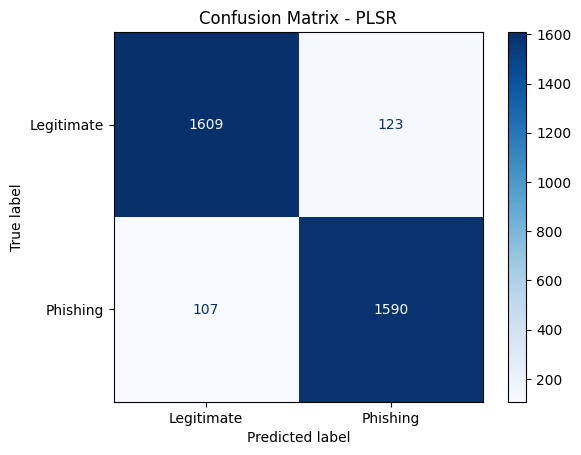

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Threshold the regression prediction to 0 or 1
y_pred_class = (y_pred_final >= 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legitimate", "Phishing"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - PLSR")
plt.show()


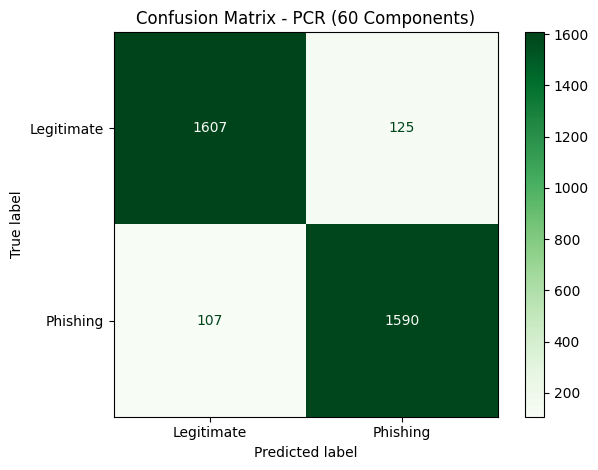

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Retrain PCR with optimal number of components 
pca = PCA(n_components=60)
X_pca = pca.fit_transform(X_scaled)

X_train_pcr, X_test_pcr, y_train_pcr, y_test_pcr = train_test_split(X_pca, y, test_size=0.3, random_state=42)

model_pcr = LinearRegression()
model_pcr.fit(X_train_pcr, y_train_pcr)
y_pred_pcr = model_pcr.predict(X_test_pcr)

# Convert to binary predictions using threshold of 0.5
y_pred_binary = (y_pred_pcr >= 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test_pcr, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legitimate", "Phishing"])
disp.plot(cmap='Greens')
plt.title("Confusion Matrix - PCR (60 Components)")
plt.grid(False)
plt.tight_layout()
plt.show()


In Week 3, I focused on exploring feature selection and dimensionality reduction techniques to improve my phishing detection model. I began by applying forward and backward stepwise regression to identify the most predictive variables. Both methods yielded nearly identical results, with R² scores around 0.732111 and RMSE values close to 0.258776, indicating they selected similar sets of features with consistent predictive power.

After feature selection, I implemented Principal Component Regression (PCR), which involved transforming my data using PCA and then fitting a linear model on the reduced components. I visualized the cumulative explained variance using an elbow plot to determine the optimal number of components, which turned out to be 60 to explain at least 95% of the variance. This model achieved an R² score of 0.7215 and an RMSE of 0.2639. I also created a confusion matrix to evaluate classification accuracy and plotted the R² against the number of components to visualize model performance.

I then turned to Partial Least Squares Regression (PLSR), which is similar to PCR but builds components that consider the target variable during dimensionality reduction. This approach required far fewer components, only 11 to reach similar performance, achieving an R² of 0.7322 and an RMSE of 0.2587. I visualized this with a component tuning curve and a dot plot comparing PLSR and PCR results